In [79]:
import PIL
from PIL import Image, ImageDraw
import colorsys
import random
import math
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from Modules import shapes
from Modules import colors
from Modules import image_maker

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
#we will focus on drawing the images first. 

"""
Each image will have at least one of and up to all of the following: 

1. A triangle
2. A circle
3. A square
"""

'\nEach image will have at least one of and up to all of the following: \n\n1. A triangle\n2. A circle\n3. A square\n'

In [38]:
color_picker = colors.ColorPicker(colors.KNOWN_COLORS, colors.default_hls_settings)

In [65]:
colors_lst = color_picker(4)

In [66]:
#print(colors)

In [67]:
#colors.pop()

In [68]:
#print(colors)

In [69]:
"""
This is how to generate an image with a background color
"""
canvas_size = (224, 224)
canvas_color = (228, 150, 150)

canvas = Image.new(mode='RGB',
                   size=canvas_size,
                   color=colors_lst.pop(),
                  )

In [70]:
#canvas.show()

In [71]:
draw = ImageDraw.Draw(canvas)

In [72]:
"""
Here we will draw a triangle
"""
# coordinates = [
#     (12, 72),
#     (40, 37),
#     (100, 96)
# ]
# color = (132, 25, 68)
# draw.polygon(xy=coordinates,
#              fill=color)

triangle = shapes.Triangle()(image_shape=canvas_size, color=colors_lst.pop())
draw.polygon(xy=triangle.parameterization,
             fill=triangle.color)

In [73]:
#canvas.show()

In [74]:
"""
Here we draw a circle

draw.ellipse()

PARAMETERS:
xy – Two points to define the bounding box. Sequence of either [(x0, y0), (x1, y1)] or [x0, y0, x1, y1], where x1 >= x0 and y1 >= y0.

outline – Color to use for the outline.

fill – Color to use for the fill.

width –

The line width, in pixels.
"""


# def generate_bounding_box(starting_point, size):
#     """Given the x0, y0, generate the x1, y1 where x1 > x0 and y1 > y0"""
#     other_point = tuple(point + size for point in starting_point)
#     parameterization = [starting_point, other_point]
#     return parameterization

# starting_point = (200, 200)
# color = (177, 200, 37)
# draw.ellipse(xy=generate_bounding_box(starting_point, 50),
#             fill=color)

specifications = {
    'min_size': 25,
    'max_size': 66
}

circle = shapes.Circle(specifications=specifications)(color=colors_lst.pop(), image_shape=canvas_size)
draw.ellipse(xy=circle.parameterization,
             fill=circle.color)

In [75]:
#canvas.show()

In [76]:
"""
Now lets make the square
"""

specifications = {
    'min_size': 30,
    'max_size': 82
}
# starting_point = (170, 100)
fillcolor = (69, 69, 69)
# draw.rectangle(xy=generate_bounding_box(starting_point, 75),
#                fill=fillcolor)

square = shapes.Square(specifications=specifications)(color=colors_lst.pop(),image_shape=canvas_size)
draw.rectangle(xy=square.parameterization,
               fill=square.color)

## Making the images programmatically

In [80]:
color_picker = colors.ColorPicker(colors.KNOWN_COLORS, colors.default_hls_settings)

In [82]:
img_generator = image_maker.ImageMaker(image_shape=(224, 224),
                                       color_picker=color_picker,
                                       number_of_colors=4,
                                       shapes = [
                                           shapes.Triangle(),
                                           shapes.Circle(specifications={
                                               'min_size': 30,
                                               'max_size': 82
                                           }),
                                           shapes.Square(specifications={
                                               'min_size': 25,
                                               'max_size': 66
                                           })
                                       ]
)

In [93]:
image_instance = img_generator()

In [94]:
image_instance

{'image_shape': (224, 224),
 'background_color': (136, 136, 206),
 'shapes': {'Circle': Circle(parameterization=[(47, 108), (101, 162)], color=(136, 206, 136)),
  'Triangle': Triangle(parameterization=[(81, 130), (5, 172), (144, 198)], color=(136, 171, 206)),
  'Square': Square(parameterization=[(113, 118), (154, 159)], color=(206, 136, 136))}}

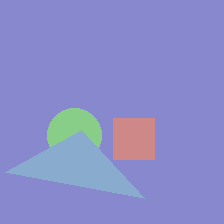

In [95]:
image_maker.construct_image(image_instance)

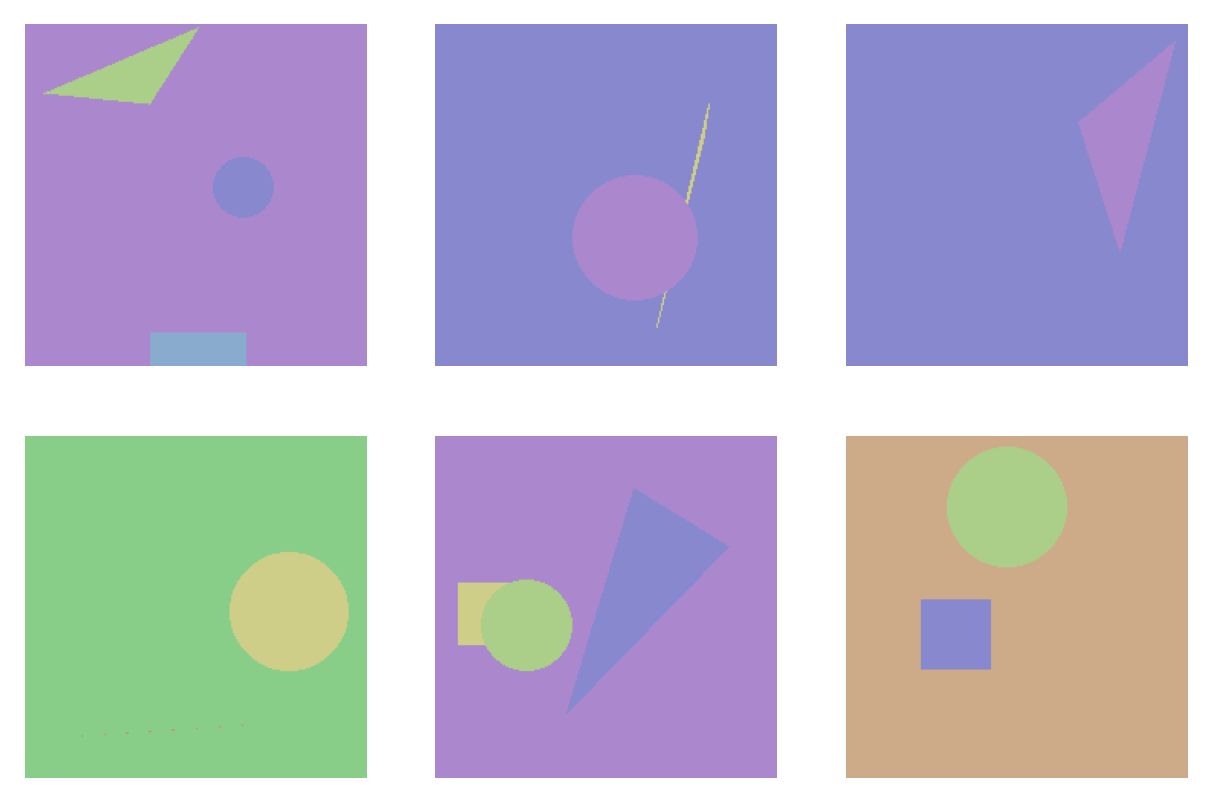

In [116]:
fig, axs = plt.subplots(2,3, dpi=250)
for i in range(2):
    for j in range(3):
        ax = axs[i,j]
        ax.axis('off')
        ax.imshow(image_maker.construct_image(img_generator()))